In [1]:
import opendatasets as od
import pandas as pd
 
od.download('https://www.kaggle.com/competitions/digit-recognizer/data')

Skipping, found downloaded files in ".\digit-recognizer" (use force=True to force download)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam

In [3]:
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

# use cpu instead of gpu
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [20]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('digit-recognizer/train.csv')
x, y = df.drop('label', axis=1), df['label']
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
train_y = enc.fit_transform(train_y.values.reshape(-1,1)).toarray()
train_X = train_X.values.reshape(-1,28,28,1)

In [21]:
df['label'].values

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

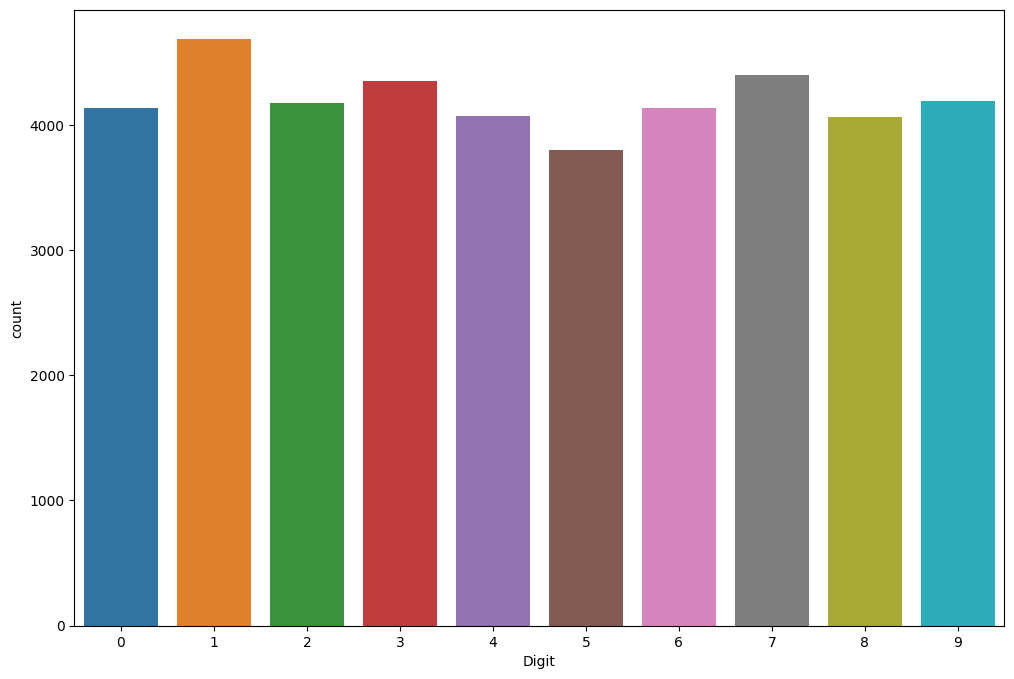

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x = df['label'])
plt.xlabel('Digit')
plt.show()

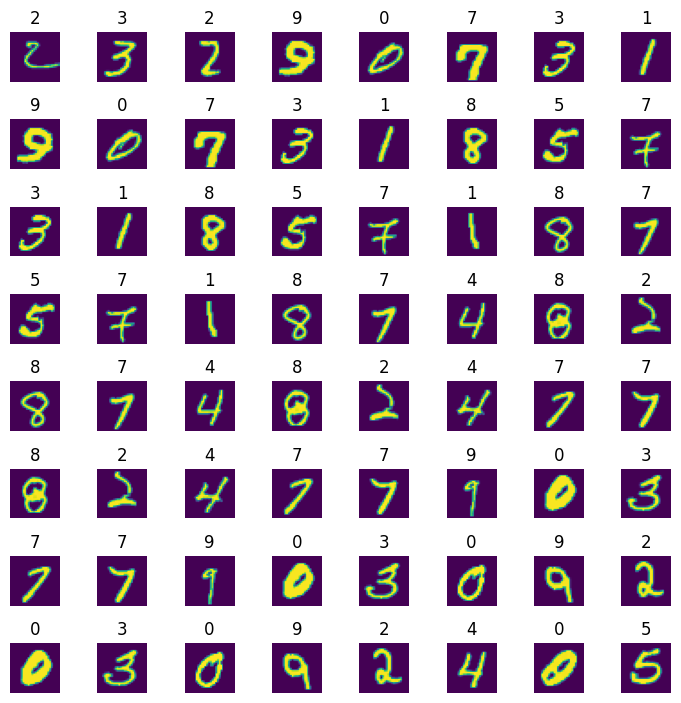

In [6]:
fig, ax = plt.subplots(8,8,figsize=(7,7))
fig.tight_layout(pad=0.1)
for i in range(8):
    for j in range(8):
        img = train_X[3*i+j]
        label = train_y[3*i+j].tolist().index(1)
        ax[i][j].imshow(img)
        ax[i][j].set_title(label)
        ax[i][j].axis('off')

In [14]:
model = Sequential([
    Conv2D(64, 3, activation='relu', padding='same', input_shape = (28,28,1)),
    BatchNormalization(),
    Conv2D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(3),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), #spars - y can only take one from 10 values
    optimizer=tf.keras.optimizers.Adam(0.001),          #logists - Z function 
    metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor="val_accuracy", 
        patience=20,
        verbose=1,
        mode="max",
        restore_best_weights=True, 
     )

history = model.fit(
    train_X,train_y,
    epochs=35,
    batch_size=128,
    callbacks=[early_stop]
)

Epoch 1/5


c:\Program Files\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


525/525 [==============================] - 26s 48ms/step - loss: 0.3678 - accuracy: 0.9298
Epoch 2/5
525/525 [==============================] - 22s 43ms/step - loss: 0.0745 - accuracy: 0.9766
Epoch 3/5
525/525 [==============================] - 21s 41ms/step - loss: 0.0538 - accuracy: 0.9831
Epoch 4/5
525/525 [==============================] - 23s 44ms/step - loss: 0.0437 - accuracy: 0.9857
Epoch 5/5
525/525 [==============================] - 23s 44ms/step - loss: 0.0398 - accuracy: 0.9875


In [9]:
test = pd.read_csv('digit-recognizer/test.csv')
test = test.values.reshape(-1,28,28,1)

In [10]:
prediction = model.predict(test)

875/875 [==============================] - 5s 5ms/step


In [11]:
test_y = enc.fit_transform(test_y.values.reshape(-1,1)).toarray()
test_X = test_X.values.reshape(-1,28,28,1)


In [12]:
model.evaluate(test_X, test_y)

 11/263 [>.............................] - ETA: 1s - loss: 0.0689 - accuracy: 0.9773 

c:\Program Files\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


263/263 [==============================] - 2s 5ms/step - loss: 0.0801 - accuracy: 0.9794


[0.08012601733207703, 0.9794047474861145]

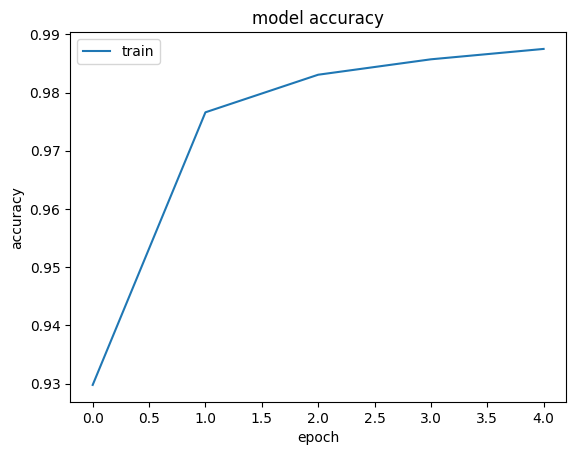

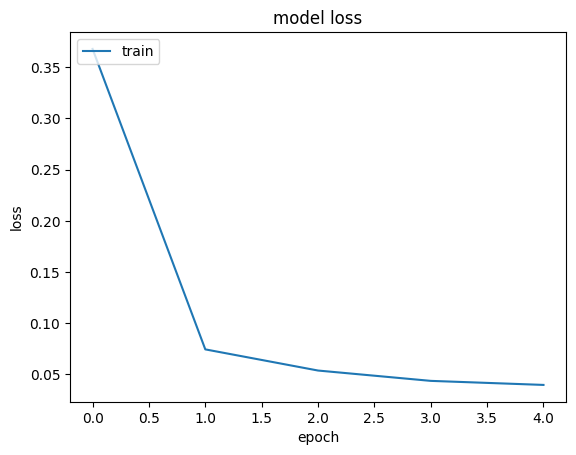

In [38]:

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
test = pd.read_csv('digit-recognizer/test.csv')
test = test.values.reshape(-1,28,28,1)
prediction = model.predict(test)
submition = pd.read_csv('digit-recognizer/sample_submission.csv')
submition['Label'] = np.argmax(prediction, axis=1)
submition.to_csv('digit-recognizer/submission.csv',index=False)